# codecentric.AI Bootcamp &mdash; NLP / Lösungen

*Hallo und herzlich willkommen zum codecentric.AI bootcamp!*

Im Tutorial haben wir bereits eine Anwendung von NLP vorgestellt. Nun wollen wir Dich in einem
praktischen Teil dazu einladen, selbst ein paar typische NLP-Techniken auszuprobieren und zu implementieren. Dabei erfährst Du,

1. wie elegant sich N-Gramme in Python extrahieren lassen,
2. wieviel Stopp-Wörter Politiker verwenden,
3. wie man in wenigen Zeilen "Wer fällt aus der Reihe?" programmiert,
4. was sich hinter dem tf-idf-Maß verbirgt und wie man scikit-learn-Transformer verwendet.

Damit es gleich losgehen kann, benötigen wir die folgenden Bibliotheken.

*Viel Spaß!*

In [1]:
import os
import numpy as np
import pandas as pd
import gensim

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()

## Aufgabe 1: Von einzelnen Wörtern zu Wortgruppen

Als erste Möglichkeit, einen Text zu analysieren, haben wir uns dessen *einzelne Wörter* beziehungsweise dessen bag of words angeschaut. Oft ist es hilfreich, zusätzlich *Wortgruppen* anzuschauen, etwa alle auftretenden Wortpaare. Für den Beispielsatz

> "Fischers Fritz fischt frische Fische"

wären das also

> "Fischers Fritz", "Fritz fischt", "fischt frische", "frische Fische".

Allgemein bezeichnet man als [N-Gramm](https://de.wikipedia.org/wiki/N-Gramm) ein Tupel von N aufeinander folgenden Token. Ist N=2 wie im Beispiel, so spricht man von _Bigrammen_.

### (a)  Bigramme extrahieren

Schreibe eine Funktion `bigrams`, die eine Liste `words` von Wörtern als Eingabe nimmt und die Menge aller auftretenden Bigramme zurückgibt. Tipp: Verwende `zip`!

In [2]:
def bigrams(words):
    return set(zip(words[:-1], words[1:]))

In [3]:
WORDS = ["Fischers", "Fritz", "fischt", "frische", "Fische"]
bigrams(WORDS)

{('Fischers', 'Fritz'),
 ('Fritz', 'fischt'),
 ('fischt', 'frische'),
 ('frische', 'Fische')}

### (b) N-Gramme extrahieren

Schreibe nun eine Funktion `ngrams`, die eine Liste `words` von Wörtern und eine Zahl `n` erwartet und die Menge aller n-Gramme zurückgibt. Tipp: mit `zip(*iters)` kann man `zip` auf eine ganze Liste `iters` von `Iterable`s anwenden. 

In [4]:
def ngrams(words, n):
    l = len(words) - n + 1
    return set(zip(*[words[i:l + i] for i in range(0,n)]))

In [5]:
ngrams(WORDS,3)

{('Fischers', 'Fritz', 'fischt'),
 ('Fritz', 'fischt', 'frische'),
 ('fischt', 'frische', 'Fische')}

## Aufgabe 2: Wer verwendet die meisten Stopp-Wörter?

Ein üblicher Arbeitsschritt bei NLP ist die Entfernung sogenannter [Stopp-Wörter](https://de.wikipedia.org/wiki/Stoppwort), die häufig auftreten, aber für den Anwendungsfall keine wesentliche Informationen beinhalten. Wir testen, wieviel Stopp-Wörter in den Reden auftauchen, die wir im Tutorial klassifiziert hatten. Dazu lesen wir die Reden nochmal ein:

In [6]:
DATA_PATH = "data"
ANALYSIS_FILE = "speeches.pickle"
ANALYSIS_PATH = os.path.join(DATA_PATH, ANALYSIS_FILE)

df = pd.read_pickle(ANALYSIS_PATH)

### (a) Stopp-Wörter filtern 

Eine Liste von 231 Stopp-Wörtern ist in [NLTK](https://www.nltk.org/) enthalten. Wir haben diese Stopp-Wörter zeilenweise in der Datei `data/stopwords_nltk.txt` abgespeichert. Schreibe

- eine Funktion `read_stopwords`, die die Liste der Stopp-Wörter einliest und als Menge zurückgibt,
- eine Funktion  `filter_words`, die aus einer Liste `words` alle Wörter ausfiltert, die in `stopwords` enthalten sind, und die bereinigte Liste zurückgibt. 

Tips:

- Öffne die Datei der Stopwörter mit der Option `encoding="utf-8"`.
- Benutze gegebenenfalls die Methode [rstrip](https://docs.python.org/3/library/stdtypes.html), um Zeilenumbrüche von eingelesenen Strings zu entfernen.
- `filter_words` sollte ein Einzeiler sein.

In [7]:
STOPWORDS_FILE = "stopwords_nltk.txt"
STOPWORDS_PATH = os.path.join(DATA_PATH, STOPWORDS_FILE)

def read_stopwords(filename = STOPWORDS_PATH):
    with open(filename, mode="r", encoding="utf-8") as file:
        words = set([word.rstrip("\n") for word in file])
    return words

def filter_words(words, stopwords):
    return [w for w in words if w not in stopwords]

Teste Deine Funktionen wie folgt:

In [8]:
EXAMPLE = ["Das", "ist", "ein", "ganz", "und", "gar", "normaler", "Satz", "mit", "vielen", "Wörtern"]
stopwords = read_stopwords()
filter_words(EXAMPLE, stopwords)

['Das', 'ganz', 'gar', 'normaler', 'Satz', 'vielen', 'Wörtern']

### (b) Anwendung auf die Reden

Füge nun dem pandas-DataFrame `df` eine Spalte `filtered_tokens` hinzu, die für jede Rede die Liste der Token enthält, aus denen die Stopp-Wörter entfernt wurden.


In [9]:
df["filtered_tokens"] = df["tokens"].map(lambda t: filter_words(t, stopwords))
df.head()

,person,speech,analysis,tokens,lemmata,entities,filtered_tokens
10,Angela Merkel,Liebe Kolleginnen und Kollegen aus dem Deutsch...,"([Liebe, Kolleginnen, und, Kollegen, aus, dem,...","[Liebe, Kolleginnen, und, Kollegen, aus, dem, ...","[lieben, Kollegin, und, Kollege, aus, der, Deu...","[Deutschen Bundestag, \nIch, Falls der Mauer, ...","[Liebe, Kolleginnen, Kollegen, Deutschen, Bund..."
100,Bernd Neumann,In seiner Rede betonte Staatsminister Bernd Ne...,"([In, seiner, Rede, betonte, Staatsminister, B...","[In, seiner, Rede, betonte, Staatsminister, Be...","[In, sich, reden, betonen, Staatsminister, Ber...","[Bernd Neumann, nationalsozialistischen, deuts...","[In, Rede, betonte, Staatsminister, Bernd, Neu..."
101,Bernd Neumann,dass ein überaus erfolgreicher Rockmusiker im ...,"([dass, ein, überaus, erfolgreicher, Rockmusik...","[dass, ein, überaus, erfolgreicher, Rockmusike...","[dass, einen, überaus, erfolgreich, Rockmusike...","[Geburtstages, Aschermittwoch, \nAn, Heinz Rud...","[dass, überaus, erfolgreicher, Rockmusiker, Um..."
102,Bernd Neumann,"ich freue mich sehr, heute gemeinsam mit Ihnen...","([ich, freue, mich, sehr, ,, heute, gemeinsam,...","[ich, freue, mich, sehr, ,, heute, gemeinsam, ...","[ich, freuen, sich, sehr, ,, heute, gemeinsam,...","[Literaturportal.de, Kulturportal, Umweltporta...","[freue, ,, heute, gemeinsam, Ihnen, Literaturp..."
103,Bernd Neumann,es war eine wichtige und richtungweisende Ents...,"([es, war, eine, wichtige, und, richtungweisen...","[es, war, eine, wichtige, und, richtungweisend...","[ich, sein, einen, wichtig, und, richtungweise...","[Berlin, SBZ, DDR, Deutschen Film-A.G., \nUnte...","[wichtige, richtungweisende, Entscheidung, ,, ..."


Füge als Nächstes `df` eine Spalte `stop_percentage` hinzu, die für jede Rede angibt, wieviel Prozent der Rede Stopp-Wörter waren.

In [10]:
df["stop_percentage"] = (1- df["filtered_tokens"].map(len) / df["tokens"].map(len)) * 100 
df.head()

,person,speech,analysis,tokens,lemmata,entities,filtered_tokens,stop_percentage
10,Angela Merkel,Liebe Kolleginnen und Kollegen aus dem Deutsch...,"([Liebe, Kolleginnen, und, Kollegen, aus, dem,...","[Liebe, Kolleginnen, und, Kollegen, aus, dem, ...","[lieben, Kollegin, und, Kollege, aus, der, Deu...","[Deutschen Bundestag, \nIch, Falls der Mauer, ...","[Liebe, Kolleginnen, Kollegen, Deutschen, Bund...",36.612022
100,Bernd Neumann,In seiner Rede betonte Staatsminister Bernd Ne...,"([In, seiner, Rede, betonte, Staatsminister, B...","[In, seiner, Rede, betonte, Staatsminister, Be...","[In, sich, reden, betonen, Staatsminister, Ber...","[Bernd Neumann, nationalsozialistischen, deuts...","[In, Rede, betonte, Staatsminister, Bernd, Neu...",34.810127
101,Bernd Neumann,dass ein überaus erfolgreicher Rockmusiker im ...,"([dass, ein, überaus, erfolgreicher, Rockmusik...","[dass, ein, überaus, erfolgreicher, Rockmusike...","[dass, einen, überaus, erfolgreich, Rockmusike...","[Geburtstages, Aschermittwoch, \nAn, Heinz Rud...","[dass, überaus, erfolgreicher, Rockmusiker, Um...",31.875000
102,Bernd Neumann,"ich freue mich sehr, heute gemeinsam mit Ihnen...","([ich, freue, mich, sehr, ,, heute, gemeinsam,...","[ich, freue, mich, sehr, ,, heute, gemeinsam, ...","[ich, freuen, sich, sehr, ,, heute, gemeinsam,...","[Literaturportal.de, Kulturportal, Umweltporta...","[freue, ,, heute, gemeinsam, Ihnen, Literaturp...",41.935484
103,Bernd Neumann,es war eine wichtige und richtungweisende Ents...,"([es, war, eine, wichtige, und, richtungweisen...","[es, war, eine, wichtige, und, richtungweisend...","[ich, sein, einen, wichtig, und, richtungweise...","[Berlin, SBZ, DDR, Deutschen Film-A.G., \nUnte...","[wichtige, richtungweisende, Entscheidung, ,, ...",37.575758


### (d) Stopp-Wort-Anteile visualisieren

Plotte abschließend den prozentualen Anteil an Stopp-Wörtern in den Redern nach Politikern gruppiert in einem geeigneten. Wodurch fallen Kanzler auf?

Tipp: Verwende [kategorielle Plot-Funktionen](https://seaborn.pydata.org/tutorial/categorical.html) von seaborn oder schau im Tutorial nach.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

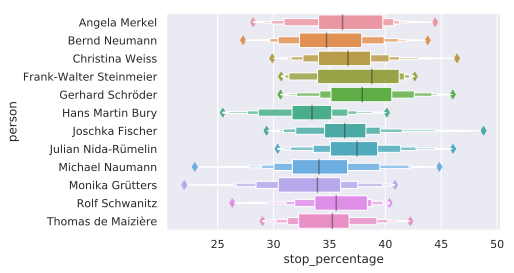

In [11]:
_ = sns.boxenplot(y="person", x="stop_percentage", data=df)

## Aufgabe 3: Wer fällt aus der Reihe?

Word embeddings kann man nicht nur für ernsthaftes NLP verwenden, sondern auch, um Spaß zu haben. Im Tutorial hatten wir schon ein kleines Tabu-Spiel programmiert. Nun wollen wir in wenigen Zeilen eine Funktion `find_the_odd` schreiben, die aus einer Liste von Wörtern den Ausreißer herausfindet &mdash; das Wort, das aus der Reihe fällt. Zum Beispiel also

> Fruehling, Sommer, Abend, Herbst
> => Abend


Dazu benötigen wir wieder die Wortvektoren aus der [Arbeit](https://devmount.github.io/GermanWordEmbeddings/) von [Andreas Müller](https://github.com/devmount).

In [12]:
WV_PATH = os.path.join("data", "german.model.reduced")

w2v = gensim.models.KeyedVectors.load(WV_PATH)

### (a) Ähnlichkeitsmatrix berechnen

Die Wortvektoren sind nun in als gensim-`KeyedVectors`-Objekt `w2v` verfügbar. Die Methode `similarity` berechnet zu gegebenen Wörtern nun deren [Cosinus-Ähnlichkeit](https://de.wikipedia.org/wiki/Kosinus-%C3%84hnlichkeit): 0 heißt keine Ähnlichkeit, 1 heißt Übereinstimmung.

In [13]:
w2v.similarity("Mensch", "Maschine")

/usr/local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.38742455329824577

Schreibe nun eine Funktion `similarity_matrix`, die eine Liste `words` von Wörtern als Eingabe nimmt und ein 2-dimensionales numpy-Array zurückliefert, dessen Eintrag an der Stelle `[i,j]` die Cosinus-Ähnlichkeit zwischen den Wörtern `words[i]` und `words[j]` ist. 

In [14]:
def similarity_matrix(words):
    mat = np.zeros((len(words), len(words)))                   
    for (i,v) in enumerate(words):
        for (j,w) in enumerate(words):
            mat[i,j] = w2v.similarity(v,w)
    return mat

Mit Hilfe der numpy-Funktion [asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) und List-Komprehensionen geht das in zwei Zeilen:

In [15]:
def similarity_matrix(words):
    sims = [[[w2v.similarity(w1, w2)] for w1 in words] for w2 in words]
    return np.asarray(sims)

### (b) Ausreißer finden 

Um den Ausreißer in einer Liste `words` von Wörtern zu finden, können wir nun die Matrix `similarity_matrix(words)` nehmen und die Einträge jeder Zeile aufsummieren: die Zeile mit der kleinsten Summe entspricht dem Ausreißer. Schreibe eine Funktion `find_the_odd`, welche dies umsetzt. Hilfreich sind dabei die numpy-Funktionen [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) und [np.argmin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html).

In [16]:
def find_the_odd(words):
    return words[np.argmin(np.sum(similarity_matrix(words), axis=0))]

### (c) Probier es aus! 

Teste nun Deine Funktion an folgenden Beispielen und denk Dir selber welche aus! Beachte dabei, dass alle Wörter groß geschrieben und die Umlaute `ä`, `ö`, `ü` sowie `ß` als `ae`, `oe`, `ue` beziehungsweise `ss`umgeschrieben werden müssen. 

In [17]:
ODDS = [["Fruehling", "Sommer", "Abend", "Herbst"],
        ["Fruehstueck", "Oma", "Abendbrot", "Mittagessen"],
        ["Rot", "Gruen", "Blau", "Maler"],
        ["Hund", "Mensch", "Hase", "Katze"],
        ["Tochter", "Mutter", "Grossmutter", "Cousine"]
    ]

for odd_set in ODDS:
    print(", ".join(odd_set), " => ", find_the_odd(odd_set))

Fruehling, Sommer, Abend, Herbst  =>  Abend
Fruehstueck, Oma, Abendbrot, Mittagessen  =>  Oma
Rot, Gruen, Blau, Maler  =>  Maler
Hund, Mensch, Hase, Katze  =>  Mensch
Tochter, Mutter, Grossmutter, Cousine  =>  Cousine


## Aufgabe 4: Klassifikation mit dem tf-idf-Maß und scikit-learn

In dem Tutorial  haben wir zwei statistische Größen für die Klassifikation der Reden genutzt: *welche* Token, Grundformen beziehungsweise Begriffe auftauchen, zusammengefasst in einer *bag of words*, und *wie oft* jedes Token et cetera in jeder Rede auftaucht. In dieser Aufgabe lernen wir weitere wichtige Größen kennen:

- die *Vorkommenshäufigkeit*, welche im Englischen *term frequency* (*tf*) genannt wird,
- die *inverse Dokumentvorkommenshäufigkeit*, englisch *inverse document frequency* (*idf*),
- das kombinierte [tf-idf-Maß](https://de.wikipedia.org/wiki/Tf-idf-Ma%C3%9F).

Diese messen jeweils

- wie "wichtig" das Token für die Rede ist &mdash; je häufiger, desto wichtiger,
- wie "spezifisch" das Token für die gesamte Redensammlung ist &mdash; je häufiger, desto unwichtiger,
- eine Kombination beider Aspekte: ein Token ist umso bedeutender, je öfter es in der Rede auftaucht und je seltener in anderen.

Mit Hilfe dieser Größen wollen wir nun die Reden, die wir bereits im Tutorial angeschaut haben, noch einmal klassifizieren. Dazu laden wir erstmal den aufbereiteten Datensatz.

In [ ]:
DATA_PATH = "data"
ANALYSIS_FILE = "speeches.pickle"

df = pd.read_pickle(os.path.join(DATA_PATH, ANALYSIS_FILE))

### (a) Vorverarbeitung mit scikit-learn-Transformern

[scikit-learn](https://scikit-learn.org) bietet zahlreiche Hilfsmittel für die Vorverarbeitung von Daten, unter anderem die Klasse [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Bestimme damit die Tfidf-Statistiken der Reden in folgenden Schritten:

1. Bestimme die Menge aller Token, die in den Reden auftreten, und nennen diese Menge `vocab`;
2. erzeuge mit `TfIdfVectorizer(vocabulary=vocab)` ein Objekt `vectorizer`;
3. bilde für jede Rede aus der Liste der Token eine Zeichenkette, indem die Token mit Leerzeichen verknüpft werden;
4. wende die Methode `vectorizer.fit_transform` auf das erhaltene `Iterable` von Zeichenketten an und nenne das Ergebnis `tfidf`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vocab = list(set.union(*list(map(set, df.tokens))))
speeches_strings = df.tokens.apply(lambda token_list: str.join(" ", token_list))
vectorizer = TfidfVectorizer(vocabulary=vocab)
tfidf = vectorizer.fit_transform(speeches_strings)

Wenn alles geklappt hat, können wir uns die wichtigsten Terme einer Rede wie folgt anschauen:

In [ ]:
REDE = 13 # Index der Rede
termsAndTfidfs = list(zip(vocab, tfidf.toarray()[REDE]))
termsAndTfidfs.sort(reverse=True, key=lambda termAndTfidf: termAndTfidf[1])
termsAndTfidfs[:25]

### (b) Klassifikation mit dem tf-idf-Maß

Nun kannst Du mit den gewonnenen tf-idf-Daten einen Bayes-Klassifizierer trainieren. Die wesentlichen Schritte sind wie im Tutorial

1. Zerlegung der Daten in Trainings- und Testdaten &mdash; dafür bietet scikit-learn die Routine [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
2. das eigentliche Training mit Hilfe von [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) und der Methode `fit` sowie
3. die Beurteilung des Trainings-Erfolgs mit Hilfe der Testdaten mit Hilfe der Methode `predict` und der Funktion [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# 1.
# Zur Erinnerung: Die Namen der Redner*Innen sind in df["person"] gespeichert
trainSpeeches, testSpeeches, trainSpeakers, testSpeakers = train_test_split(tfidf, df["person"], test_size = 0.3, random_state = 42)
#trainSpeeches, testSpeeches, trainSpeakers, testSpeakers = ____(____, ____, test_size = 0.3, random_state = 42)

# 2.
classifier = MultinomialNB()
classifier.fit(trainSpeeches, trainSpeakers)
#classifier.____(____, ____)

# 3.
predictedSpeakers = classifier.predict(testSpeeches)
#predictedSpeakers = classifier.____(____)
accuracy = np.mean(testSpeakers == predictedSpeakers)
speakers = np.unique(testSpeakers)
confusionMatrix = confusion_matrix(testSpeakers, predictedSpeakers)
print(accuracy)
_ = sns.heatmap(confusionMatrix, xticklabels=speakers, yticklabels=speakers)

Es stellt sich wahrscheinlich heraus, dass keine zufriedenstellende Qualität erreicht wird. Natürlich könnte oder sollte man das wie im Tutorial durch wiederholte Tests genauer prüfen. Der Grund ist schnell gefunden: pro Redner haben wir im Schnitt _zu wenig Reden_.